In [19]:
# Plot H0 Q-Q plots

import pickle
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import os

In [20]:
def PlotH0(Model, Index, n, Lapscale, sig, Xdist, testtype, fixedU, randomBeta, Ugen):
    fname = Model + "_Setting_" + str(Index) + "_n_" + str(n) + "_Lapscale_" + str(Lapscale) + "_sig_" + str(sig) + "_Xdist_" + str(Xdist) + "_testtype_" + testtype + "_fixedU_" + str(fixedU) + "_randomBeta_" + str(randomBeta) + "_Ugen_" + str(Ugen)

    infile = open( Model + "_results/resultsH0/data/" + fname + '_dic.p', 'rb')
    new_dict = pickle.load(infile)
    infile.close()
    pV_array = (new_dict["pV"])

    # if sig == 0:
    #     rhoName = "Independent"
    # else:
    #     rhoName = 'AR(1) ' + r'$\rho=' +str(sig) + '$'

    if Ugen == "t3":
        SettingName = r'$t(3)$'
    elif Ugen == "t5":
        SettingName = r'$t(5)$'
    elif Ugen == "t10":
        SettingName = r'$t(10)$'
    elif Ugen == "Ump1":
        SettingName = r'$Uniform(-1,1)$'
    else:
        print("error")


    fig = plt.figure()
    fig.suptitle(SettingName, fontsize=20)
    for t in range(1, 6):
        ax = fig.add_subplot(int('15' + str(t)))
        res = stats.probplot(pV_array[:,(t-1)], dist="uniform", plot=pylab)
        ax.set_title('t=' + str(t), fontsize=18)
        ax.set_ylabel('')
        ax.set_xlabel('')
    fig.set_size_inches(11.2, 3.2)   
    fig.text(0.5,0.04, "Theoretical Quantiles", ha="center", va="center", fontsize=20)
    fig.text(0.025,0.5, "Sample Quantiles", ha="center", va="center", rotation=90, fontsize=17)
    fig.tight_layout(rect=[0.05, 0.07, 1, 0.95])

    #===========================create folder to store output results=====================
    results_path_data = "./Result_Figure/ResultsH0"
    # Check whether the specified path exists or not
    isExist = os.path.exists(results_path_data)

    if not isExist:
        # Create a new directory because it does not exist
        os.makedirs(results_path_data)
    plt.savefig(Model + "_results/Result_Figure/ResultsH0/" + fname +'.pdf')

In [21]:
# Model = "logistic"
# Index = 1
# n = 300
# Lapscale = 0
Xdist = "uniform"
# sig = 0
testtype = "Wald"
fixedU = False
randomBeta = False

In [22]:
ModelList = ["logistic"]
SettingsList = [1]
nList = [2000]
sigList = [0.1]
LapscaleList = [0.1]
UgenList = ["t3", "t5", "t10", "Ump1"]

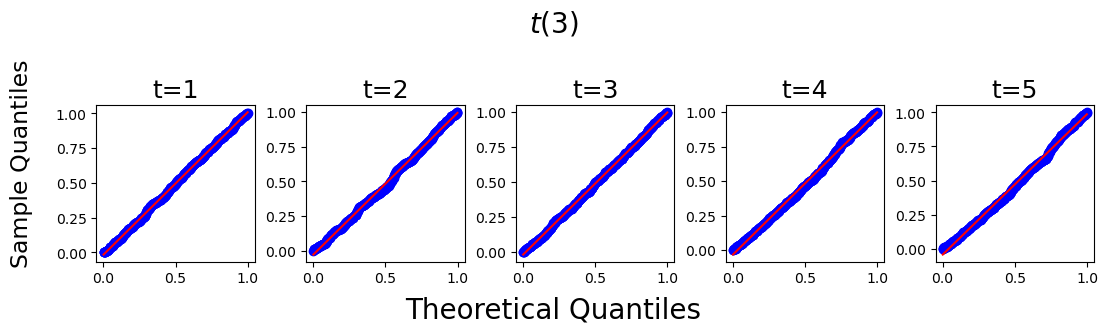

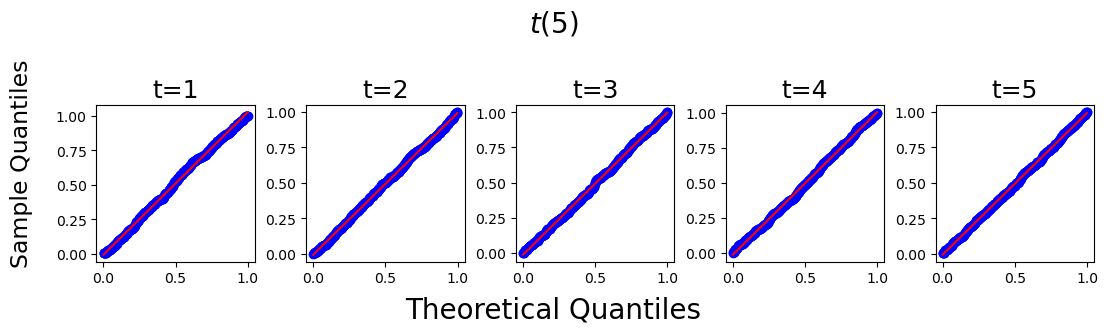

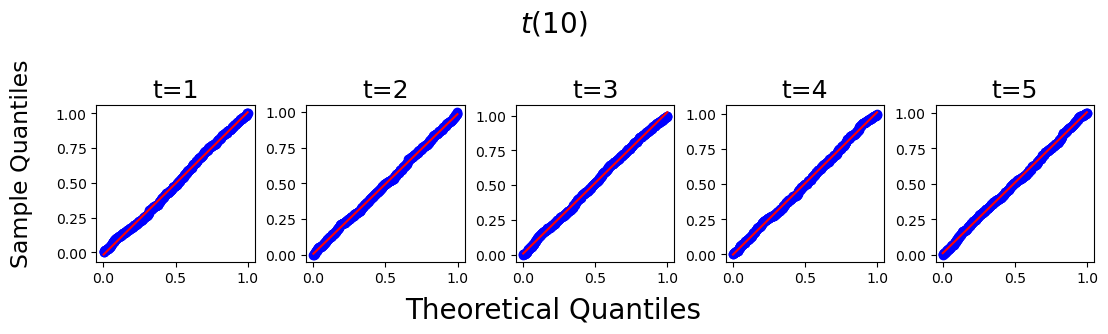

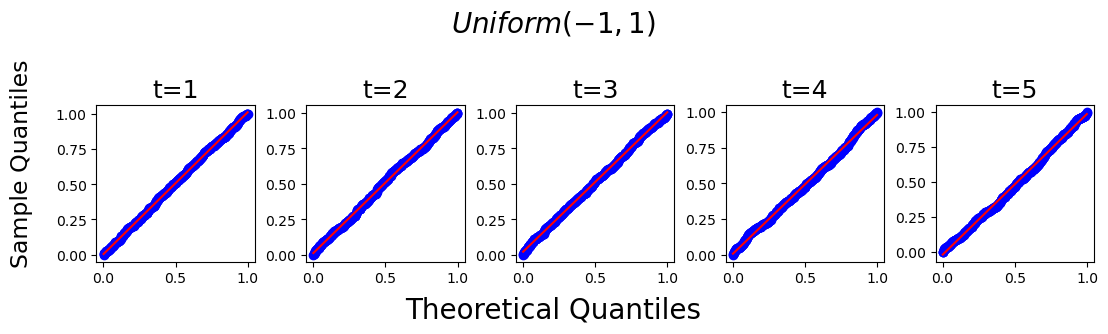

In [23]:
for Model in ModelList:
    for Index in SettingsList:
        for n in nList:
            for Lapscale in LapscaleList:
                for sig in sigList:
                    for Ugen in UgenList:
                        PlotH0(Model, Index, n, Lapscale, sig, Xdist, testtype, fixedU, randomBeta, Ugen)